In [1]:
!pip install -qU diffusers accelerate transformers huggingface_hub

In [2]:
from huggingface_hub import notebook_login
notebook_login()

# AutoPipeline

Diffusers provides many pipelines for tasks like generating images, videos, audio, and inpainting, as well as specialized pipelines for adapters and features like upscaling, super-resolution, etc.

The `AutoPipeline` class is designed to simplify the variety of pipelines in Diffusers.

For example, we will use the `dreamlike-art/dreamlike-photoreal-2.0` checkpoint. Under the hood, the `AutoPipeline`
1. detects a `"stable-diffusion"` class from the `model_index.json` file.
2. depending on the task we are interested in, it loads the `StableDiffusionPipeline`, `StableDiffusionImg2ImgPipeline`, or `StableDiffusionInpaintPipeline`. Any parameter (`strength`, `num_inference_steps`, etc.) we would pass to these specific pipelines can also be passed to the `AutoPipeline`.

## test-to-image

In [ ]:
from diffusers import AutoPipelineForText2Image
import torch

pipe_txt2img = AutoPipelineForText2Image.from_pretrained(
    'dreamlike-art/dreamlike-photoreal-2.0',
    torch_dtype=torch.float16,
    use_safetensors=True,
).to('cuda')

  0%|          | 0/50 [00:00<?, ?it/s]

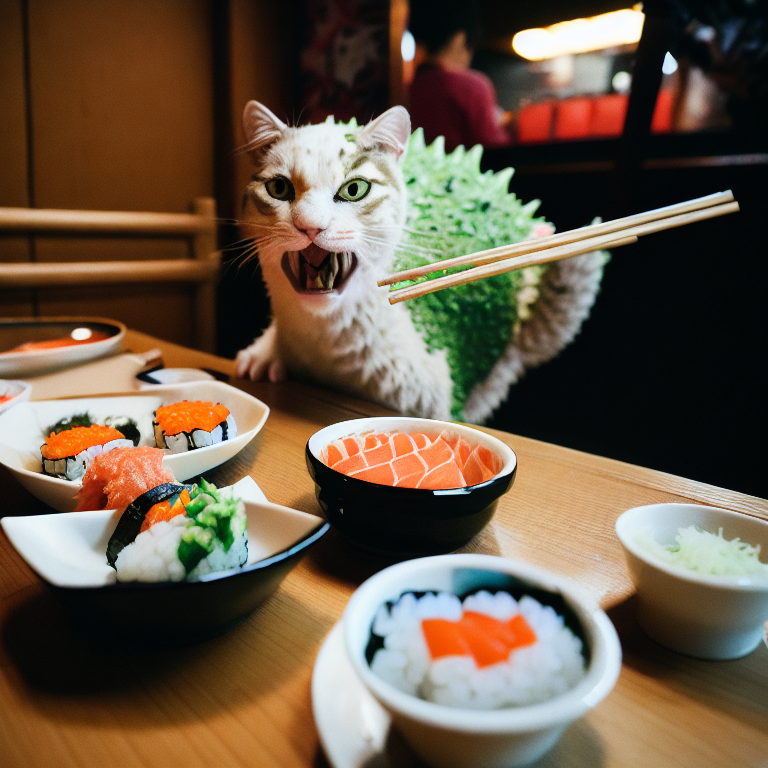

In [4]:
prompt = "cinematic photo of Godzilla eating sushi with a cat in a izakaya, 35mm photograph, film, professional, 4k, highly detailed"
generator = torch.Generator('cpu').manual_seed(111)
image = pipe_txt2img(prompt, generator=generator).images[0]
image

## image-to-image

In [5]:
from diffusers import AutoPipelineForImage2Image
from diffusers.utils import load_image
import torch

pipe_img2img = AutoPipelineForImage2Image.from_pretrained(
    'dreamlike-art/dreamlike-photoreal-2.0',
    torch_dtype=torch.float16,
    use_safetensors=True,
).to('cuda')

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

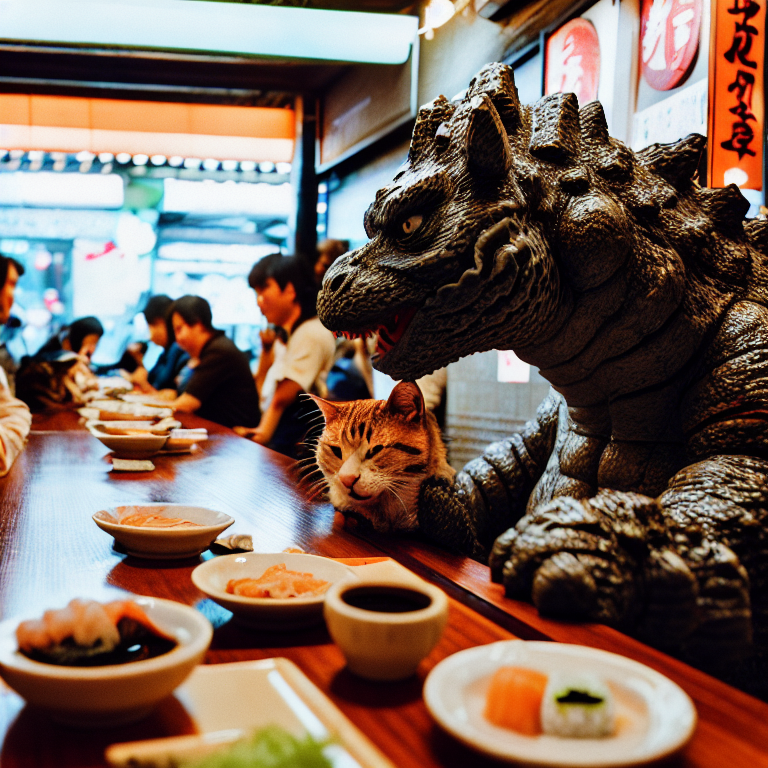

In [6]:
init_image = load_image("https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/diffusers/autopipeline-text2img.png")
init_image

  0%|          | 0/40 [00:00<?, ?it/s]

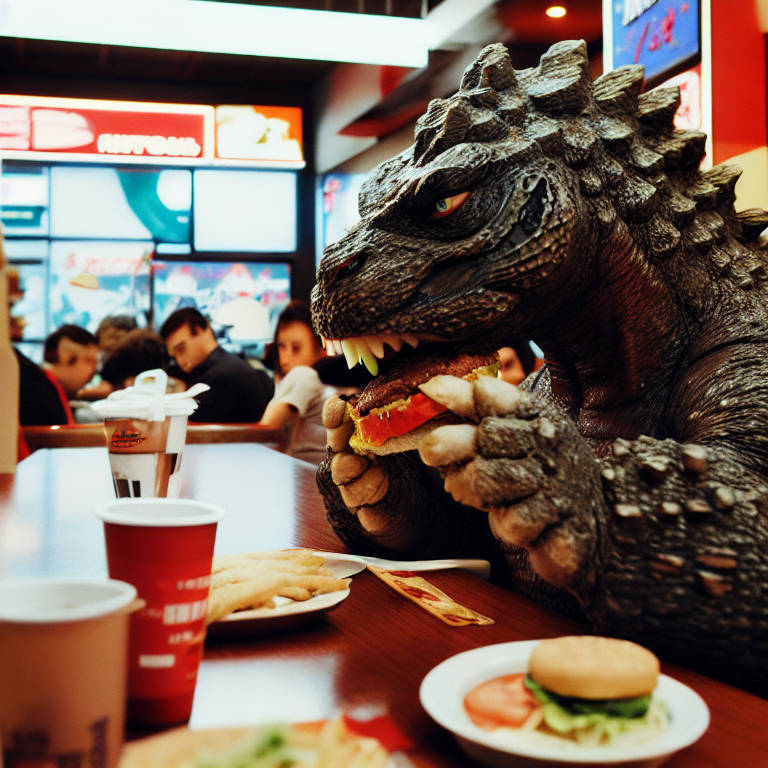

In [7]:
prompt = "cinematic photo of Godzilla eating burgers with a cat in a fast food restaurant, 35mm photograph, film, professional, 4k, highly detailed"
generator = torch.Generator('cpu').manual_seed(111)
image = pipe_img2img(prompt, image=init_image, generator=generator).images[0]
image

## inpainting

In [3]:
from diffusers import AutoPipelineForInpainting
from diffusers.utils import load_image
import torch

pipe_inpaint = AutoPipelineForInpainting.from_pretrained(
    'stabilityai/stable-diffusion-xl-base-1.0',
    torch_dtype=torch.float16,
    use_safetensors=True,
).to('cuda')

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/609 [00:00<?, ?B/s]

Fetching 19 files:   0%|          | 0/19 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/479 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/565 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/737 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.78G [00:00<?, ?B/s]

text_encoder_2/config.json:   0%|          | 0.00/575 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer_2/tokenizer_config.json:   0%|          | 0.00/725 [00:00<?, ?B/s]

tokenizer_2/special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/10.3G [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/1.68k [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/642 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

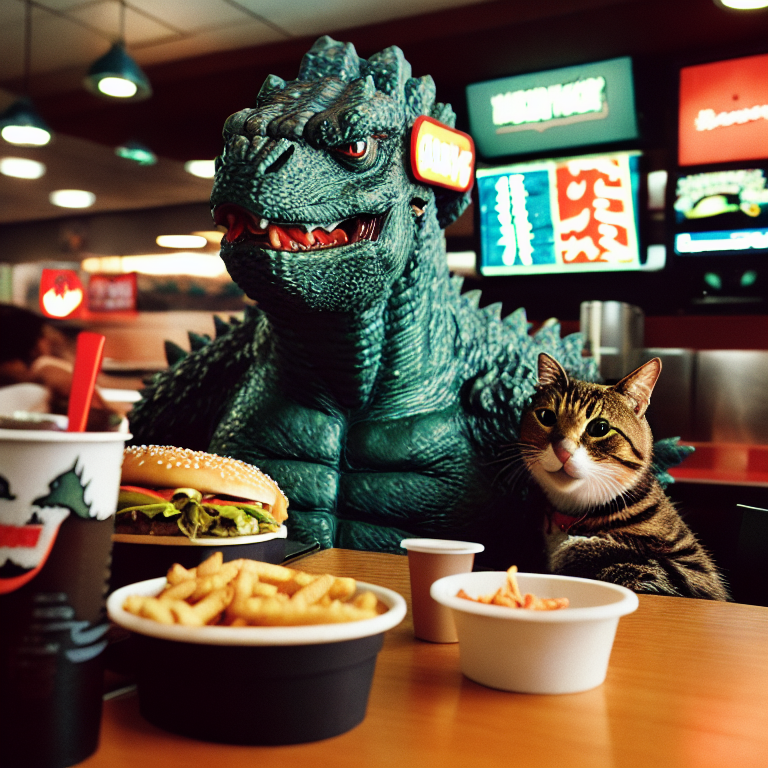

In [4]:
init_image = load_image("https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/diffusers/autopipeline-img2img.png")
init_image

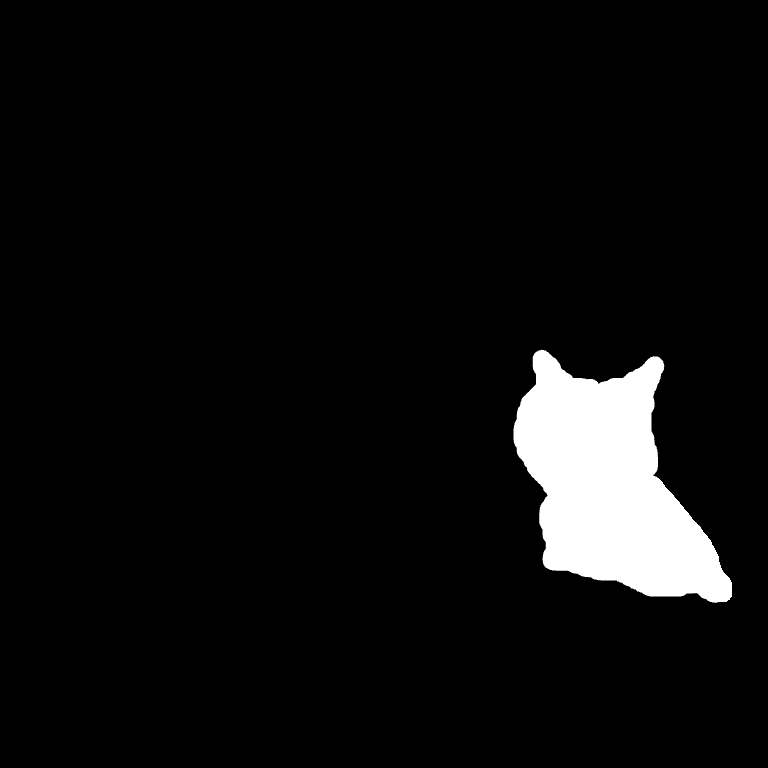

In [5]:
mask_image = load_image("https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/diffusers/autopipeline-mask.png")
mask_image

In [6]:
prompt = "cinematic photo of a owl, 35mm photograph, film, professional, 4k, highly detailed"
generator = torch.Generator('cpu').manual_seed(111)
image = pipe_inpaint(
    prompt,
    image=init_image,
    mask_image=mask_image,
    generator=generator,
    strength=0.4,
).images[0]
image

Output hidden; open in https://colab.research.google.com to view.

## Unsupported checkpoints

The `AutoPipeline` supports Stable Diffusion, Stable Diffusion XL, ControlNet, Kandinsky 2.2, and DeepFloyd IF checkpoints.

In [7]:
from diffusers import AutoPipelineForImage2Image
import torch

pipeline = AutoPipelineForImage2Image.from_pretrained(
    'openai/sha-e-img2img',
    torch_dtype=torch.float16,
    use_safetensors=True,
)

OSError: openai/sha-e-img2img is not a local folder and is not a valid model identifier listed on 'https://huggingface.co/models'
If this is a private repository, make sure to pass a token having permission to this repo with `token` or log in with `huggingface-cli login`.